# Telecom Churn Analysis

# Importing the data

In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

C:\Users\Harish Patlolla\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Harish Patlolla\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Harish Patlolla\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


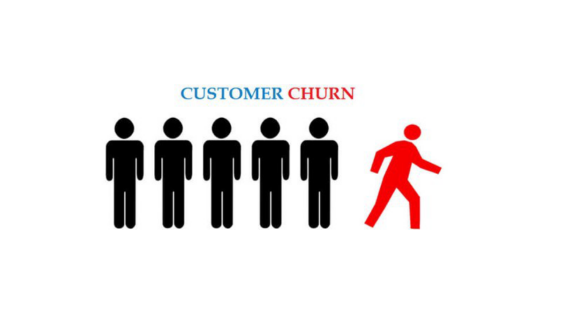

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
import seaborn as sns
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
from PIL import  Image
%matplotlib inline

plt.figure(figsize=(10,10))
img = np.array(Image.open(r"D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\Telecom Churn Analysis\churn.jpg"))
plt.imshow(img,interpolation="bilinear")
plt.axis("off")
plt.show()

In [5]:
os.chdir('D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\Telecom Churn Analysis')
churn_data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
churn_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
churn_data.shape

(7043, 21)

### Looking at the missing values in the data set

In [8]:
churn_data.isnull().sum().sort_values(ascending=False)

Churn               0
OnlineSecurity      0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineBackup        0
TotalCharges        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
customerID          0
dtype: int64

### Type conversion

In [9]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [10]:
churn_data.drop(columns=['customerID'],inplace=True)
#High correlation between the variables monthly charges and the total charges
churn_data.drop(columns=['TotalCharges'],inplace=True)

In [11]:
churn_data['SeniorCitizen']=churn_data['SeniorCitizen'].astype('object')
# churn_data['TotalCharges'].replace(' ',0,inplace=True)
# churn_data['TotalCharges']=churn_data['TotalCharges'].astype('float')

# Exploratory Data Analysis

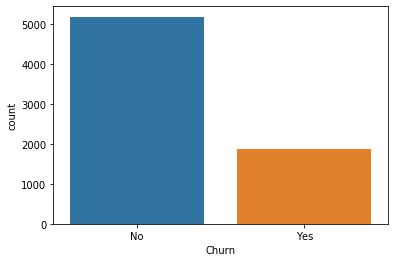

This is a class imbalance problem , which will be later handled using sampling techiques


In [12]:
# Looking at the values of Yes and No's in the target variable CHURN
sns.countplot(data = churn_data, x = 'Churn')
plt.show()
print('This is a class imbalance problem , which will be later handled using sampling techiques')

# Chi-Square test of Independence

https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/chi-square/

A chi-square test for independence compares two variables in a contingency table to see if they are related. In a more general sense, it tests to see whether distributions of categorical variables differ from each another.
A very small chi square test statistic means that your observed data fits your expected data extremely well. In other words, there is a relationship.
A very large chi square test statistic means that the data does not fit very well. In other words, there isn’t a relationship.

In [13]:
from scipy.stats import chi2_contingency

def categorical_association(df, c1, c2):
    
    #Function to plot the barchart of target variable vs the predictor variables
    def catplot_function(df, c1, c2):
        g = sns.catplot(x=c1, col=c2,
                 data=df, saturation=.5,
                kind="count",height=4, aspect=.7)
        plt.xticks(rotation=90)
        plt.show()
        
    
    catplot_function(df, c1, c2)
    
    data=pd.crosstab(df[c1],df[c2])
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    s, p, d, t=chi2_contingency(data.fillna(0))
    print('The chi-square statistic value is ' +str(s))
    print('The p-value is ' +str(p))
    if (p<0.05):
        print(color.BOLD+color.GREEN + 'There is association between '+str(c1) +' and  ' +str(c2))
    else:
        print(color.BOLD+color.RED +'There is no association between '+str(c1) +' and  ' +str(c2))
    print(' ')
    print(color.END+' ')
    

### <font color='maroon'>1. Checking graphically as well as using statistics for the association between the Target and Categorical predictor variables

### a. Association between the gender and Churn

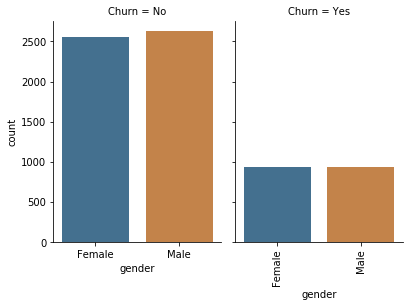

The chi-square statistic value is 0.4840828822091383
The p-value is 0.48657873605618596
There is no association between gender and  Churn
 
 


In [14]:
categorical_association(churn_data,'gender','Churn')

### b. Checking the remaining associations by iterating through all the categorical predictor variables

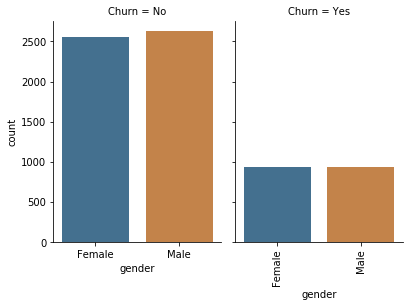

The chi-square statistic value is 0.4840828822091383
The p-value is 0.48657873605618596
There is no association between gender and  Churn
 
 


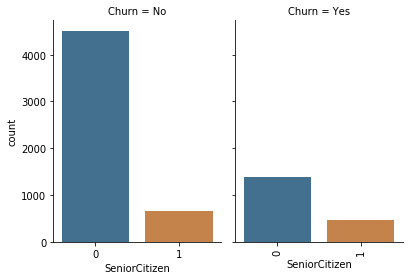

The chi-square statistic value is 159.42630036838742
The p-value is 1.510066805092378e-36
There is association between SeniorCitizen and  Churn
 
 


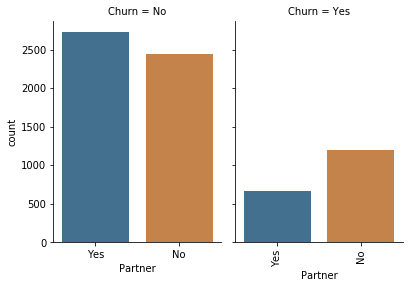

The chi-square statistic value is 158.7333820309922
The p-value is 2.1399113440759935e-36
There is association between Partner and  Churn
 
 


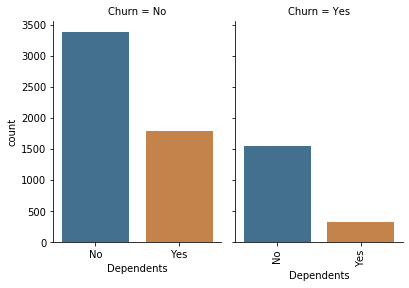

The chi-square statistic value is 189.12924940423474
The p-value is 4.9249216612154196e-43
There is association between Dependents and  Churn
 
 


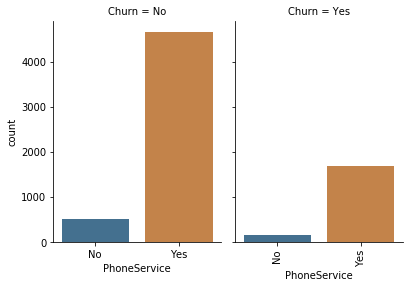

The chi-square statistic value is 0.9150329892546948
The p-value is 0.3387825358066928
There is no association between PhoneService and  Churn
 
 


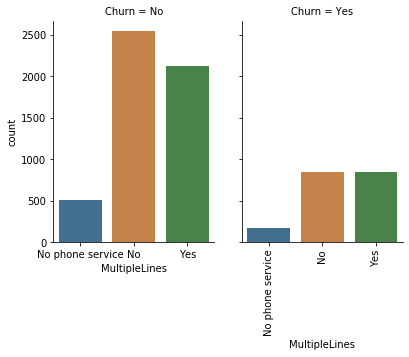

The chi-square statistic value is 11.33044148319756
The p-value is 0.0034643829548773
There is association between MultipleLines and  Churn
 
 


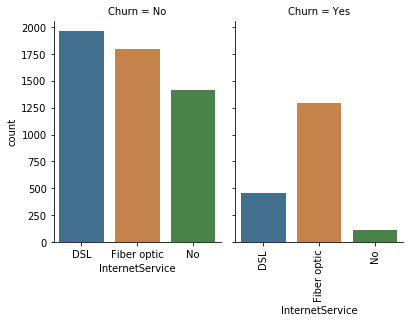

The chi-square statistic value is 732.309589667794
The p-value is 9.571788222840544e-160
There is association between InternetService and  Churn
 
 


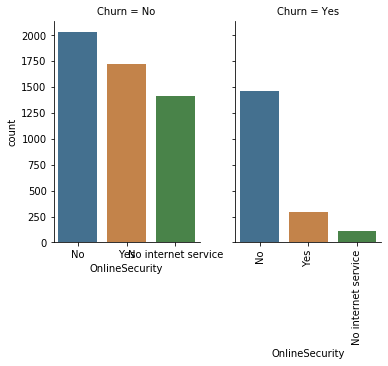

The chi-square statistic value is 849.9989679615965
The p-value is 2.661149635176552e-185
There is association between OnlineSecurity and  Churn
 
 


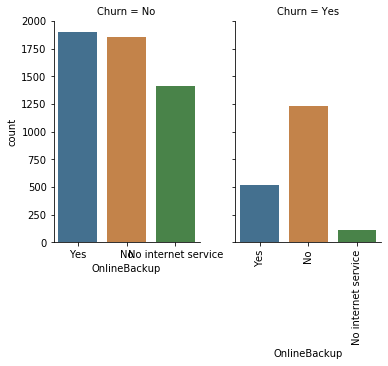

The chi-square statistic value is 601.812790113409
The p-value is 2.0797592160864276e-131
There is association between OnlineBackup and  Churn
 
 


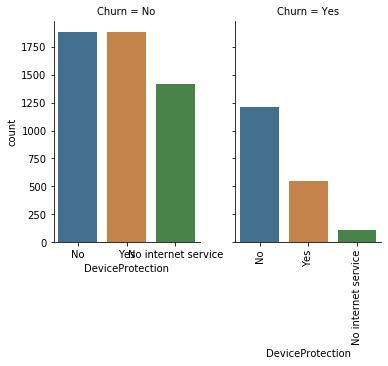

The chi-square statistic value is 558.419369407389
The p-value is 5.505219496457244e-122
There is association between DeviceProtection and  Churn
 
 


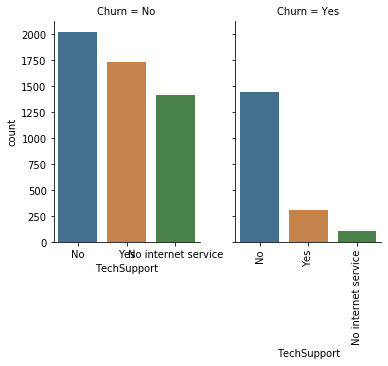

The chi-square statistic value is 828.1970684587394
The p-value is 1.4430840279998987e-180
There is association between TechSupport and  Churn
 
 


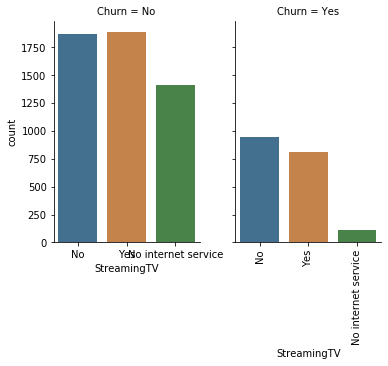

The chi-square statistic value is 374.2039433109813
The p-value is 5.528994485739183e-82
There is association between StreamingTV and  Churn
 
 


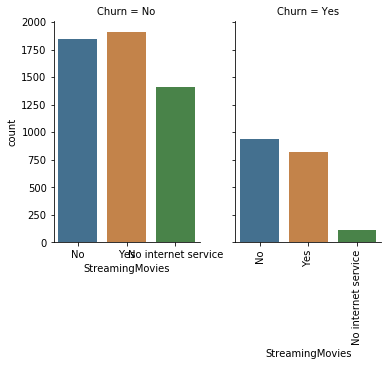

The chi-square statistic value is 375.6614793452656
The p-value is 2.667756755723681e-82
There is association between StreamingMovies and  Churn
 
 


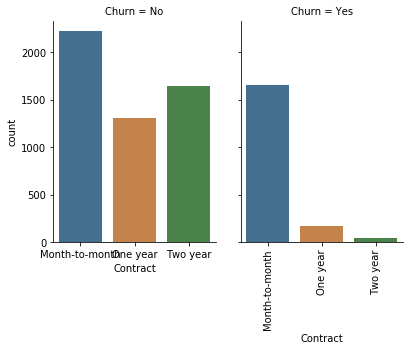

The chi-square statistic value is 1184.5965720837926
The p-value is 5.863038300673391e-258
There is association between Contract and  Churn
 
 


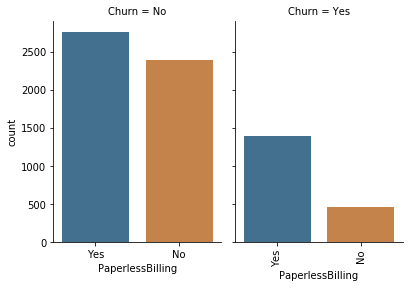

The chi-square statistic value is 258.27764906707307
The p-value is 4.073354668665985e-58
There is association between PaperlessBilling and  Churn
 
 


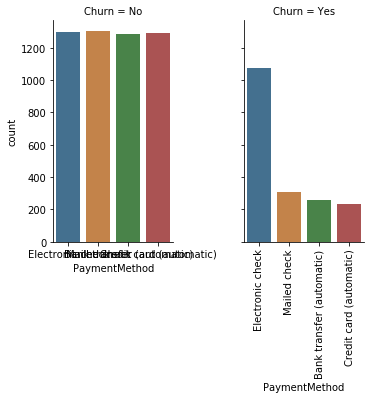

The chi-square statistic value is 648.1423274814
The p-value is 3.6823546520097993e-140
There is association between PaymentMethod and  Churn
 
 


In [15]:
columns_list=churn_data.select_dtypes(include=['object']).columns.to_list()
for i in columns_list:
    if(i != 'Churn'):
        categorical_association(churn_data,str(i),'Churn')

#### From the Chi-square test of independence, we can say except for the gender and phone service, other categorical variables are associated with the Target variable Churn

### <font color='maroon'>2. Checking graphically as well as using statistics for the association between the Target and Interval predictor variables

### a. Association between the tenure of the account and churn

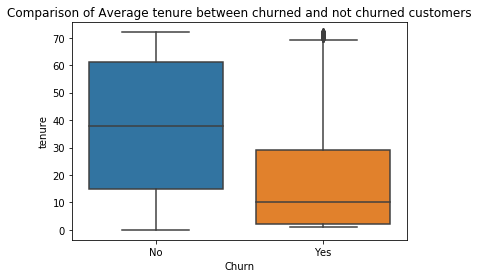

From the boxplot, we can say that accounts who stayed for longer duration with company might be less likely to churn out
Appropriate statistical test would Two-sample ttest


In [16]:
sns.boxplot(x="Churn",y="tenure",data=churn_data)
plt.title('Comparison of Average tenure between churned and not churned customers')
plt.show()
print('From the boxplot, we can say that accounts who stayed for longer duration with company might be less likely to churn out')
print('Appropriate statistical test would Two-sample ttest')

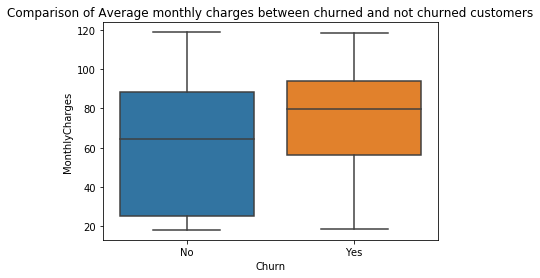

From the boxplot, we can say that accounts who are paying more monthly charges are more likely to churn out
Appropriate statistical test would Two-sample ttest


In [17]:
sns.boxplot(x="Churn",y="MonthlyCharges",data=churn_data)
plt.title('Comparison of Average monthly charges between churned and not churned customers')
plt.show()
print('From the boxplot, we can say that accounts who are paying more monthly charges are more likely to churn out')
print('Appropriate statistical test would Two-sample ttest')

### 4. Variable Transformations

In [18]:
print(color.BOLD+color.GREEN+'The skewness of the variables are ')
skewness=churn_data.skew(axis = 0, skipna = True,numeric_only=True).sort_values(ascending=False) 
print(skewness)
print('The variable looks normally distributed')

The skewness of the variables are 
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64
The variable looks normally distributed


### 5. Dummy Variables Creation

In [19]:
def dummy_variables_creation(df):
    categorical_columns_list=df.select_dtypes(include=['object']).columns.to_list()
    final=df.copy()
    for i in categorical_columns_list:
        variable_name=str(i)+'_dummy'
        variable_name=pd.get_dummies(df[i], prefix=i)
        final=pd.concat([final,variable_name],axis=1)
    total_columns_list=final.columns.values.tolist()
    To_drop_variables=[i for i in total_columns_list if i  in categorical_columns_list]
    print(color.BOLD+color.RED+'The variables that are dropped as part of dummy creation')
    print(To_drop_variables)
    To_keep_variables=[i for i in total_columns_list if i not in categorical_columns_list]
    final=final[To_keep_variables]
    return(final)

In [20]:
#separating target variable from the predictors 
Churn_Target=np.array(churn_data['Churn'])
Churn_predictors=churn_data[churn_data.columns[~churn_data.columns.isin(['Churn'])]]

In [21]:
Churn_predictors_final=dummy_variables_creation(Churn_predictors)

The variables that are dropped as part of dummy creation
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [22]:
Churn_predictors_final.head()

,tenure,MonthlyCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


#### Coding Yes=1 and No=0

In [23]:
Churn_Target_Final=np.where(Churn_Target=="No", 0, Churn_Target) 
Churn_Target_Final=np.where(Churn_Target_Final=="Yes", 1, Churn_Target_Final) 
Churn_Target_Final=Churn_Target_Final.astype('int')
Churn_Target_Final

array([0, 0, 1, ..., 0, 1, 0])

## SMOTE Sampling 

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [24]:
# transform the dataset
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
Churn_predictors_final, Churn_Target_Final = oversample.fit_resample(Churn_predictors_final,Churn_Target_Final)

C:\Users\Harish Patlolla\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Splitting the dataset into training and test 

In [25]:
# create training and testing data set (70-30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Churn_predictors_final, Churn_Target_Final, test_size=0.3,random_state=12345)

## Building a Logistic Regression model

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)
#the most important features
important_variables = rfe.get_support(1)
X_train= X_train[X_train.columns[important_variables]]
print('The variables selected are')


C:\Users\Harish Patlolla\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Harish Patlolla\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

The variables selected are


In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
X_test=X_test[X_test.columns[important_variables]]
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

C:\Users\Harish Patlolla\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Optimization terminated successfully.
         Current function value: 0.483698
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7243
Model:                          Logit   Df Residuals:                     7224
Method:                           MLE   Df Model:                           18
Date:                Fri, 06 Mar 2020   Pseudo R-squ.:                  0.3021
Time:                        12:04:06   Log-Likelihood:                -3503.4
converged:                       True   LL-Null:                       -5020.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
gender_Female                              -0.5217

## Confusion Matrix

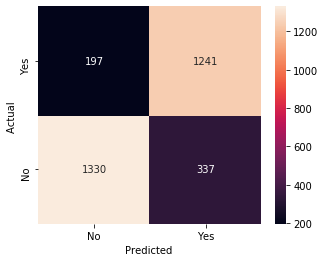

In [28]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_pred,y_test)
fig, ax = plt.subplots(figsize=(5,4))
heatmap=sns.heatmap(conf_matrix,annot=True,fmt="d",xticklabels=['No', 'Yes'],yticklabels=['No', 'Yes'])
ax.set_ylim([0,2])
plt.ylabel('Actual ')
plt.xlabel('Predicted ')
plt.show()

# <font color="darkpink">Decision Trees

In [29]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=5)
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dec_tree.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.75


In [30]:
important_variables

array([ 2,  3,  4,  5,  6,  7,  8,  9, 21, 23, 26, 28, 31, 38, 39, 40, 41,
       42, 43, 44], dtype=int64)

C:\Users\Harish Patlolla\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Harish Patlolla\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


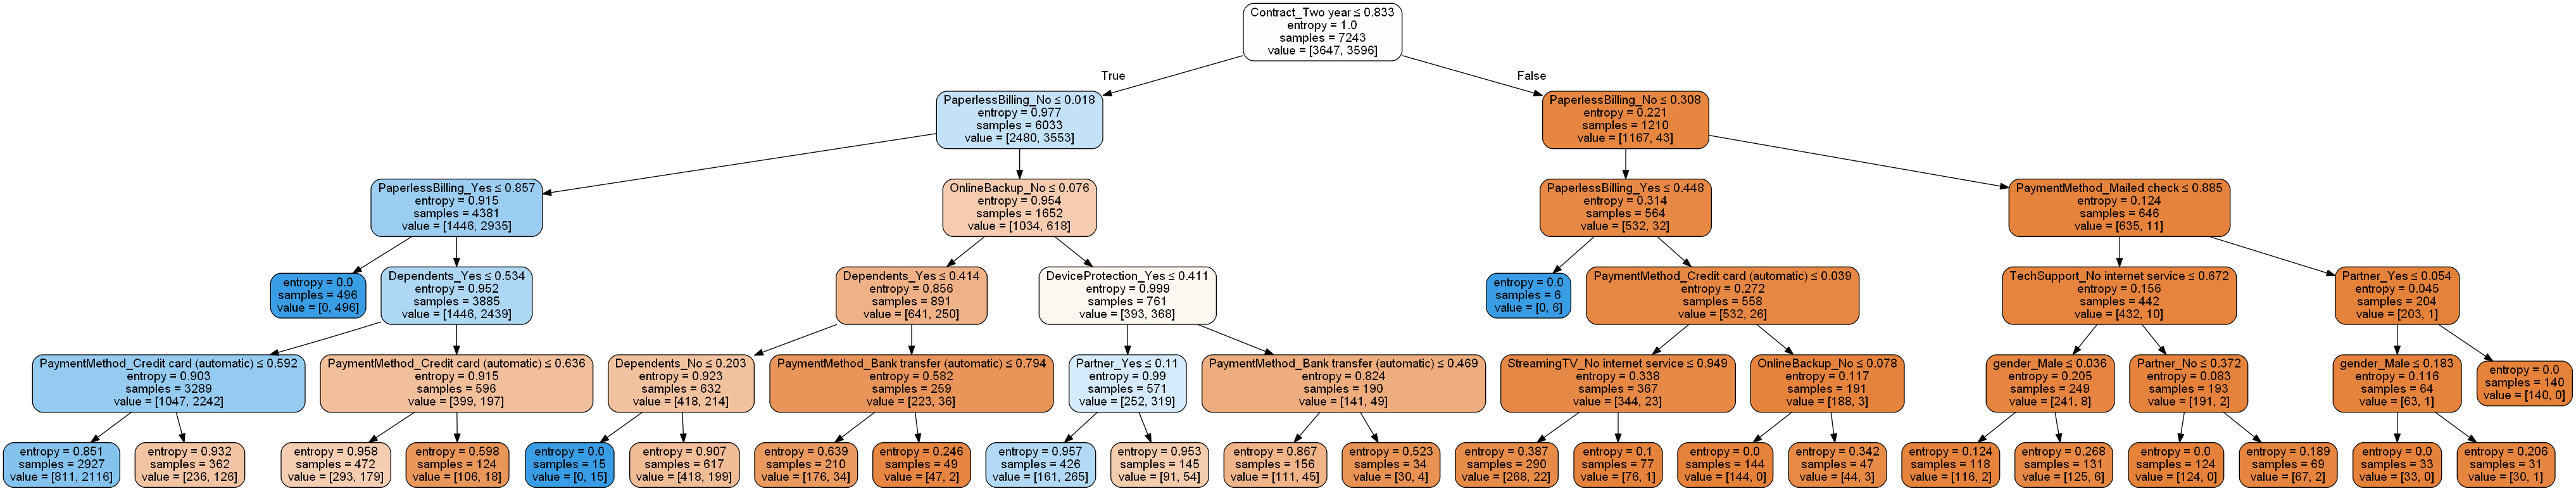

In [31]:
#fit a default regression tree

from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree
from sklearn import metrics
from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus

col_names = list(X_train.columns.values)
dot_data = StringIO()
tree.export_graphviz(dec_tree, out_file=dot_data,
                     feature_names=col_names,
                     filled=True,
                     rounded=True,
                     special_characters=True)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))

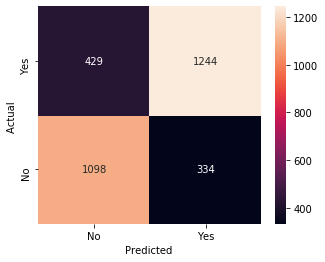

In [32]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_pred,y_test)
fig, ax = plt.subplots(figsize=(5,4))
heatmap=sns.heatmap(conf_matrix,annot=True,fmt="d",xticklabels=['No', 'Yes'],yticklabels=['No', 'Yes'])
ax.set_ylim([0,2])
plt.ylabel('Actual ')
plt.xlabel('Predicted ')
plt.show()

# Bagging Methods

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Instantiate dt
decisiontree = DecisionTreeClassifier(random_state=1)
number_of_trees=50
# Instantiate bc
bc = BaggingClassifier(base_estimator=decisiontree, 
                       n_estimators=number_of_trees, 
                       max_samples=0.7,
                       random_state=1,
                       oob_score=True)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of Bagging Classifier: {:.2f}'.format(acc_test))

Test set accuracy of Bagging Classifier: 0.81


In [34]:
print(' The number of subsets are the number of the estimators(trees) are ' +str(number_of_trees))
print('\n')
print('The subsets are')
print('\n')
print(bc.estimators_samples_)

 The number of subsets are the number of the estimators(trees) are 50


The subsets are


[array([4228, 6364, 4362, ...,  292, 2156, 1034]), array([2783, 6100, 2169, ..., 1285, 2654, 6258]), array([1615, 2618, 2905, ...,  796, 5182,  690]), array([1922, 4177, 1447, ..., 3307, 1937, 3510]), array([1414, 1378, 6402, ...,  130, 1190, 5701]), array([6421, 7051, 6798, ..., 2638, 1896,   55]), array([1101, 5659, 5434, ...,  521, 3116,  169]), array([2580, 5157, 1834, ...,  847, 1289, 1349]), array([2179, 6495, 5012, ..., 2818,  335, 5552]), array([  77, 2636, 3753, ..., 5631, 7092, 7126]), array([1219, 4653, 6288, ..., 3225, 3826, 3012]), array([1343, 2406, 5425, ..., 4656, 7166, 6202]), array([5665, 1447,  619, ..., 6066, 6653, 4608]), array([1291, 4193, 6117, ..., 6759, 5959, 7185]), array([1218, 1787, 4397, ..., 4961, 2279, 2469]), array([5070, 6542,  582, ..., 7089, 1428,  424]), array([2877,  686, 4033, ..., 3416, 3111, 2977]), array([ 931, 1904,  628, ..., 6037, 7097, 7194]), array([17

# <font color="blue"> Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
rfc.fit(X_train,y_train)
# predictions
y_pred = rfc.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.81


In [36]:
import pandas as pd

# Extract feature importances
feature_importance_random_Forest = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rfc.feature_importances_}).\
                    sort_values('importance', ascending = False)

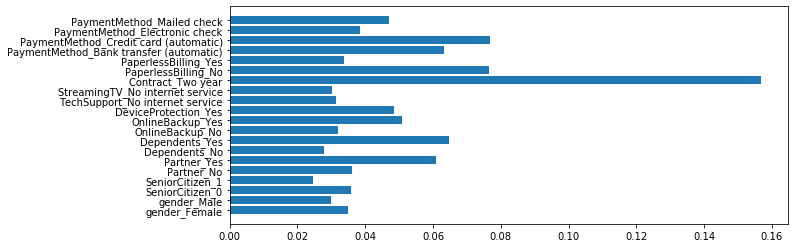

In [37]:

plt.figure(figsize=(10,4))
plt.barh(list(X_train.columns), rfc.feature_importances_)
plt.show()

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score = cross_val_score(rfc, X_test,y_test, cv=10, scoring='f1')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7992699753093062


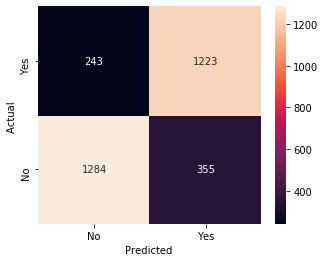

In [39]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_pred,y_test)
fig, ax = plt.subplots(figsize=(5,4))
heatmap=sns.heatmap(conf_matrix,annot=True,fmt="d",xticklabels=['No', 'Yes'],yticklabels=['No', 'Yes'])
ax.set_ylim([0,2])
plt.ylabel('Actual ')
plt.xlabel('Predicted ')
plt.show()

# Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075,0.01,0.001, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.756
Accuracy score (validation): 0.747
Learning rate:  0.075
Accuracy score (training): 0.759
Accuracy score (validation): 0.756
Learning rate:  0.01
Accuracy score (training): 0.754
Accuracy score (validation): 0.746
Learning rate:  0.001
Accuracy score (training): 0.511
Accuracy score (validation): 0.501
Learning rate:  0.1
Accuracy score (training): 0.762
Accuracy score (validation): 0.757
Learning rate:  0.25
Accuracy score (training): 0.775
Accuracy score (validation): 0.766
Learning rate:  0.5
Accuracy score (training): 0.798
Accuracy score (validation): 0.795
Learning rate:  0.75
Accuracy score (training): 0.792
Accuracy score (validation): 0.799
Learning rate:  1
Accuracy score (training): 0.800
Accuracy score (validation): 0.800


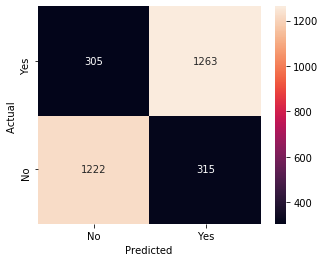

In [45]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
y_pred = gb_clf2.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_pred,y_test)
fig, ax = plt.subplots(figsize=(5,4))
heatmap=sns.heatmap(conf_matrix,annot=True,fmt="d",xticklabels=['No', 'Yes'],yticklabels=['No', 'Yes'])
ax.set_ylim([0,2])
plt.ylabel('Actual ')
plt.xlabel('Predicted ')
plt.show()

In [46]:
print('Accuracy of Gradient classifier on test set: {:.2f}'.format(gb_clf2.score(X_test, y_test)))

Accuracy of Gradient classifier on test set: 0.80
